In [1]:
import numpy as np

In [2]:
import random

In [335]:
n = 50

In [323]:
def generate_neighbors(n):
    lis = np.concatenate(([1]*round(0.45*n*n), [2]*round(0.45*n*n), [0]*round(0.1*n*n)), axis = None)
    random.shuffle(lis)
    area = np.split(lis, n)
    return area

In [304]:
def happy_neighbors(area, n):
    happy_matrix = [[' ' for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            neighbors_list = [area[i-1][j-1], area[i-1][j], area[i-1][(j+1)%n], area[i][j-1],
                             area[i][(j+1)%n], area[(i+1)%n][j-1], area[(i+1)%n][j], area[(i+1)%n][(j+1)%n]]
            one = neighbors_list.count(1)
            two = neighbors_list.count(2)
            zero = neighbors_list.count(0)
            if area[i][j] == 1 and one >= 2:
                happy_matrix[i][j] = '+'
            if area[i][j] == 1 and one < 2: 
                happy_matrix[i][j] = '-'
            if area[i][j] == 2 and two >= 2:
                happy_matrix[i][j] = '+'
            if area[i][j] == 2 and one < 2: 
                happy_matrix[i][j] = '-'
            if area[i][j] == 0:
                happy_matrix[i][j] = '0'
    return happy_matrix

In [231]:
def relocation(area, n, happy_matrix):
    list_of_minus = []
    list_of_zeros = []
    for i in range(n):
        for j in range(n):
            if happy_matrix[i][j] == '-':
                list_of_minus.append([i, j, area[i][j]])
            if area[i][j] == 0:
                list_of_zeros.append([i, j, area[i][j]])
    minus = random.choice(list_of_minus)
    zeros = random.choice(list_of_zeros)
    area[minus[0]][minus[1]] = zeros[2]
    area[zeros[0]][zeros[1]] = minus[2]
    return area, list_of_minus

In [336]:
a = []
neighbors = generate_neighbors(n)
happy_matrix = happy_neighbors(neighbors, n)
new_area, list_of_minus = relocation(neighbors, n, happy_matrix)
i = 0
df = pd.DataFrame()
while len(list_of_minus) > 1 and i < 1000:
    if i % 100 == 0: 
        for j in range(n):
            for q in range(n):
                if new_area[j][q] != 0:
                    d = {}
                    d['xa'] = j
                    d['ya'] = q
                    d['type'] = 'red' if new_area[j][q] == 1 else 'blue'
                    d['it'] = i
                    df = df.append(d, ignore_index = True)
    happy_matrix = happy_neighbors(neighbors, n)
    new_area, list_of_minus = relocation(neighbors, n, happy_matrix)
    i += 1
    a.append({'it': i, 'mcnt': len(list_of_minus)})

In [244]:
import pandas as pd

In [337]:
data = pd.DataFrame(a)

<AxesSubplot:xlabel='it'>

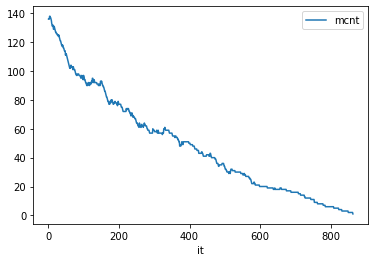

In [338]:
data.plot(x = 'it', y = 'mcnt')

In [324]:
import plotly.express as px

In [339]:
px.scatter(df, x='xa', y='ya', animation_frame="it", color = 'type')